# Plot Complex Eigenvalues

### Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
from tqdm import tqdm
from scipy.stats import mstats

from initParams import initParams
from models import RateModel
from RateModelAnalysis import plot_complex_eigenvalues

## Show connectivity matrix

Model params are:  N=100, prb=0.2


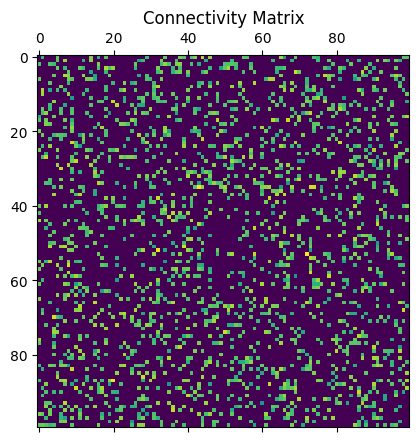

In [3]:
params = initParams(N=100)
print("Model params are: ", params)
model = RateModel(params)

W = model.W

plt.matshow(W)
plt.title('Connectivity Matrix')
plt.show()

## Show connectivity matrix and eigenvalues

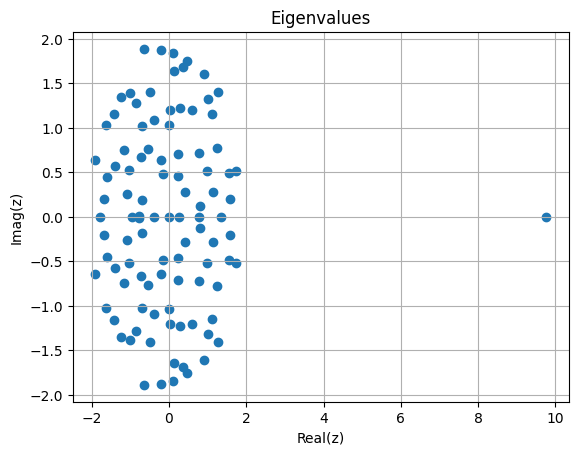

In [4]:
eigenvalues = scipy.linalg.eigvals(W)

plt.title('Eigenvalues')
plt.xlabel('Real(z)')
plt.ylabel('Imag(z)')
plt.grid()
plt.scatter(eigenvalues.real, eigenvalues.imag)
plt.show()


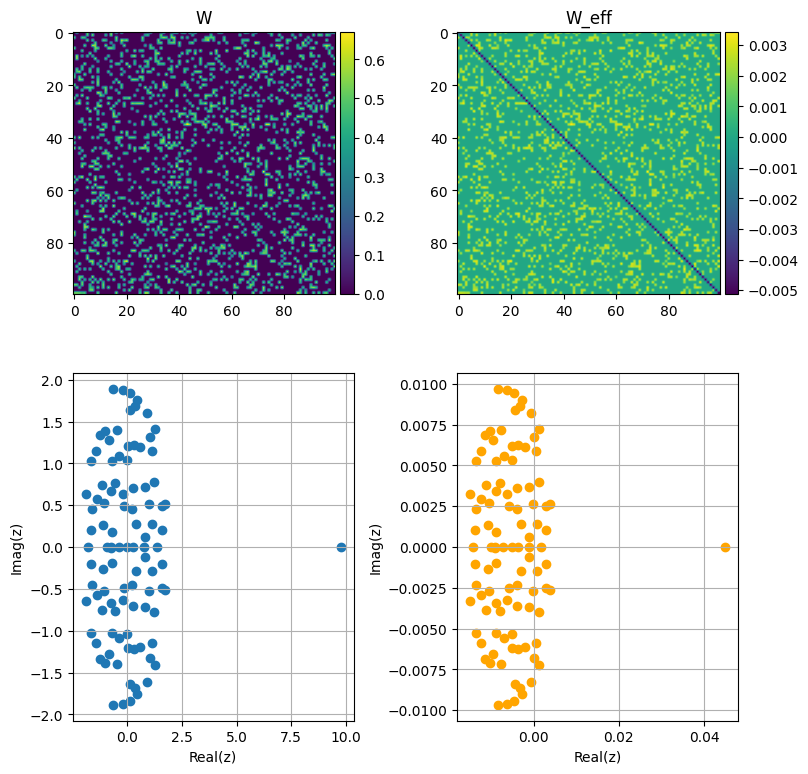

In [5]:
plot_complex_eigenvalues(model)

## Check largest real eigenvalue as function of N
Denote `G` the real value of the largest eigenvalue of a network matrix of size `N`.

This value fluctuates due to random initialization. However, for large `N` it convergences to 1.0.

In [63]:
def get_mag_W_eigval(N: int) -> float:
    params = initParams(N=N)
    model = RateModel(params)
    W_eigenvalues = scipy.linalg.eigvals(model.W)
    max_W_eigenvalue = max(W_eigenvalues, key=lambda x: x.real)
    return max_W_eigenvalue.real

In [138]:
%%timeit
get_mag_W_eigval(512)

487 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [142]:
runs = 1000
Ns = np.unique(np.logspace(4, 9, 50, base=2).astype('int'))
G = np.zeros((runs, len(Ns)))
for i in (tbar := tqdm(range(runs))):
    for j, N in enumerate(Ns):
        G[i, j] = get_mag_W_eigval(N) / 10

100%|██████████| 1000/1000 [51:30<00:00,  3.09s/it]


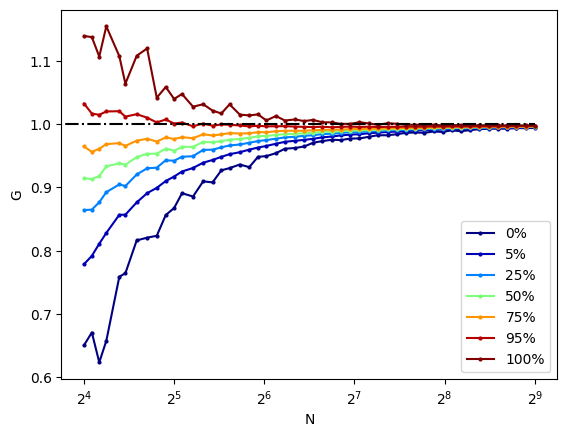

In [147]:
qs = [0.0, 0.05, 0.25, 0.50, 0.75, 0.95, 1.0]
# qs = scipy.stats.norm.cdf([-np.inf, -2, -1, 0, 1, 2, np.inf])
quantiles = mstats.mquantiles(G, prob=qs, axis=0)
colors = plt.cm.jet(qs)
fig, axis = plt.subplots()
for i, q in enumerate(quantiles):
    axis.plot(Ns, q, label=f"{int(qs[i]*100)}%", marker='o', markersize=2, color=colors[i])
axis.legend()
plt.hlines([1.0], 0.0, 512, linestyles='dashdot', colors='black')
plt.semilogx(base=2)
plt.xlabel('N')
plt.ylabel('G')
plt.show()